In [9]:
from utils.initialisation import DenseLayer
from utils.feed import feed_forward, back_prop
from utils.loss import  get_loss
from utils.activation import get_activation
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

(1000, 1)


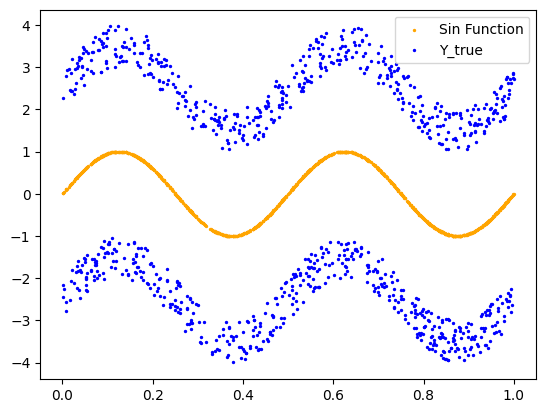

In [66]:
## Dataset Generation

'''
m : Number of data points 
X : np-array of shape (m,2) (x_true,y_true)
a : random integer used in making of y_true

Function used for y_true:
>>>>>>       X[:,1] = sin(a*X[:,0]*pi)

noise : a 1-d numpy array of size 1000 to add noise to the dataset
Y : a 1-d numpy boolean array of size 1000 used to determine whether positive noise is added or negative noise, later used in classification any datapoint
with 1/0 with 1 depicting noise begin added and 0 represent noise been subtracted.
'''

m = 1000
X = np.random.rand(m, 2)
a = np.random.randint(1,10)
X[:,1] = np.sin(a*X[:,0]*np.pi) ## Sin Function
plt.scatter(X[:,0], X[:,1],c='orange',s=2,label = "Sin Function") ## Plotting the sin function value


## Adding Noise to y_true

noise = np.random.rand(m,1) + 2
Y = np.random.choice(a=[False, True], size=(m,1))
noise = (noise * Y) + (-1*noise*(Y==False)) ## Function so that noise is either made positive or negative.
X[:,1] = X[:,1] + noise[:,0] ## Adding noise to y_true
Y = Y*1 ## Y used of classification
 
plt.scatter(X[:,0], X[:,1],c="blue",s=2, label = "Y_true") ## Plotting the y_true with noise added
plt.legend()
plt.show()

In [41]:
'''
Shapes
>>>>>>>>>>>>>>>>>>>>
    x_train : (800,2)
    y_train : (800,1)
    x_test : (200,2)
    y_test : (200,1)

'''
x_train = X[:800,:]
y_train = Y[:800,:]
x_test = X[800:,:]
y_test = Y[800:,:]

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(800, 2) (200, 2)
(800, 1) (200, 1)


In [101]:
### Training of SingleNode Perceptron Node

'''
weight : a numpy array to store weight at each iteration. 
dweight : a numpy array to store derivative weight at each iteration
'''

iteration = 200000
w1,b1 = DenseLayer(2,1)
weight = np.zeros((iteration,2))
dweight = np.zeros((iteration,2))

for _ in tqdm(range(iteration)):
    z1,a1=feed_forward(x_train,w1,b1,'sigmoid')
    da_next = (a1-y_train)
    dw1, db1, da1 = back_prop(x_train,w1,a1,da_next,'sigmoid')
    w1 -= 0.00001*dw1
    b1 -= 0.00001*db1
    dweight[_][0] = dw1[0][0]
    dweight[_][1] = dw1[1][0]
    weight[_][0] = w1[0][0]
    weight[_][1] = w1[1][0]

100%|██████████| 200000/200000 [00:39<00:00, 5126.20it/s]


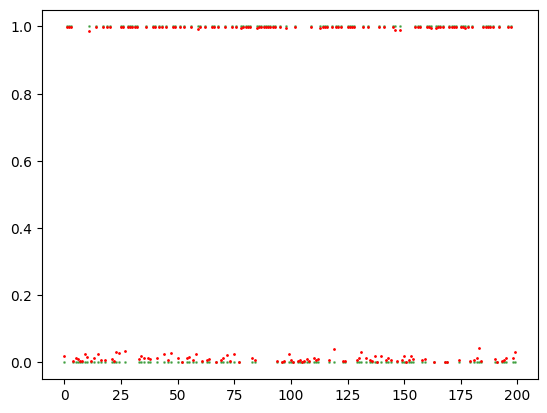

In [102]:
### Prediction 
z2,y_pred = feed_forward(x_test,w1,b1,'sigmoid')

## Plotting Prediction and Actual
plt.scatter(range(x_test.shape[0]), y_test, c = 'green', alpha=0.5,s=1)
plt.scatter(range(x_test.shape[0]), y_pred, c = 'red',s=1)

plt.show()

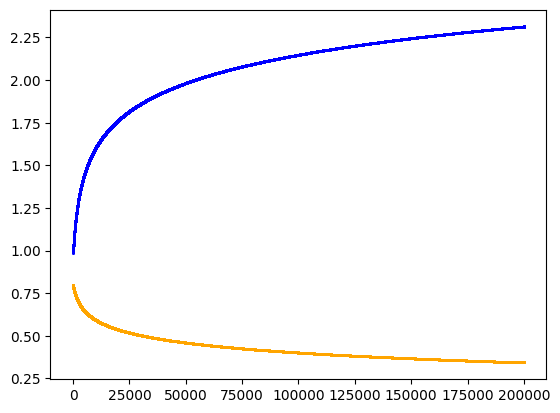

In [103]:
plt.scatter(np.arange(iteration), weight[:,0],c='orange',s=1) ## Plotting the sin function value
plt.scatter(np.arange(iteration), weight[:,1],c='blue',s=1) ## Plotting the sin function value

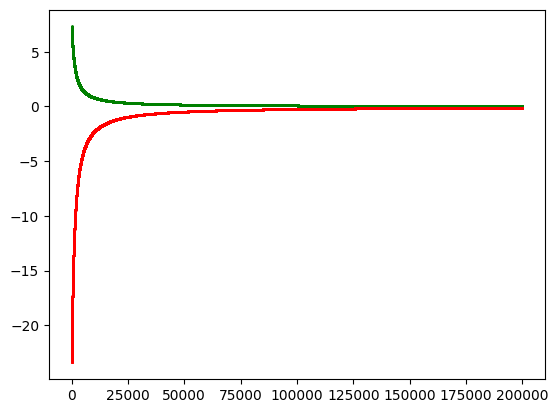

In [106]:
plt.scatter(np.arange(iteration), dweight[:,0],c='green',s=1)
plt.scatter(np.arange(iteration), dweight[:,1],c='red',s=1)